# Chapter3: 线性回归-预测网店的销售额

* 机器学习实战的架构（步骤）：
    1. 定义我们的问题是什么
    2. 数据收集和预处理
        * 收集数据
        * 数据可视化
        * 特征工程-使得数据更容易被machine 处理
        * 差分数据集-训练与测试
        * 特征缩放-regularization
    3. 选择机器学习模型
    4. 训练机器，确定参数
    5. 超参数调试和性能优化
    

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pwd

'/Users/weiye/Dropbox/My Mac (Wei’s MacBook Air)/Downloads/Learning-machine-learning-from-Zero'

In [5]:
df_ads=pd.read_csv('advertising.csv')
df_ads.head()

,wechat,weibo,others,sales
0,304.4,93.6,294.4,9.7
1,1011.9,34.4,398.4,16.7
2,1091.1,32.8,295.2,17.3
3,85.5,173.6,403.2,7.0
4,1047.0,302.4,553.6,22.1


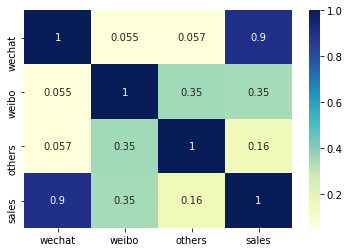

In [9]:
#分析数据-相关关系
sns.heatmap(df_ads.corr(),cmap='YlGnBu', annot=True)#Heatmap between different grops' correlations
plt.show()

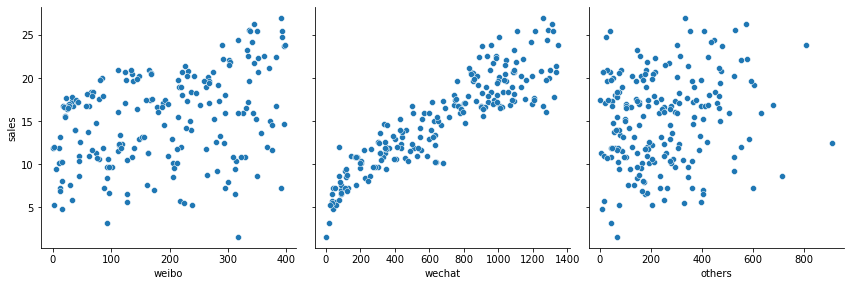

In [10]:
#分析数据-两两关系的散点图
sns.pairplot(df_ads,x_vars=['weibo','wechat','others'],y_vars='sales',height=4,
                aspect=1,kind='scatter')
plt.show()

因为微信和sales 最相关，所以多因子变为了单因子分析，见下面：

## 从这里开始也叫特征工程-先看特征tensor,如果不符合机器学习要求，改变之！！！

In [11]:

#特征大写，这里是wechat，记为X； 标签小写，这里是sales, 记为y。 用array 结构分析，在numpy package 内
X=np.array(df_ads.wechat)
y=np.array(df_ads.sales)
print('张量X的阶：',X.ndim)
print('张量X的形状：',X.shape)
print('张量X的内容：',X)

张量X的阶： 1
张量X的形状： (200,)
张量X的内容： [ 304.4 1011.9 1091.1   85.5 1047.   940.9 1277.2   38.2  342.6  347.6
  980.1   39.1   39.6  889.1  633.8  527.8  203.4  499.6  633.4  437.7
  334.  1132.   841.3  435.4  627.4  599.2  321.2  571.9  758.9  799.4
  314.   108.3  339.9  619.7  227.5  347.2  774.4 1003.3   60.1   88.3
 1280.4  743.9  805.4  905.    76.9 1088.8  670.2  513.7 1067.    89.2
  130.1  113.8  195.7 1000.1  283.5 1245.3  681.1  341.7  743.   976.9
 1308.6  953.7 1196.2  488.7 1027.4  830.8  984.6  143.3 1092.5  993.7
 1290.4  638.4  355.8  854.5    3.2  615.2   53.2  401.8 1348.6   78.3
 1188.9 1206.7  899.1  364.9  854.9 1099.7  909.1 1293.6  311.2  411.3
  881.3 1091.5   18.7  921.4 1214.4 1038.8  427.2  116.5  879.1  971.
  899.1  114.2   78.3   59.6  748.5  681.6  261.6 1083.8 1322.7  753.5
 1259.9 1080.2   33.2  909.1 1092.5 1208.5  766.2  467.3  611.1  202.5
   24.6  442.3 1301.3  314.9  634.7  408.1  560.1  503.7 1154.8 1130.2
  932.8  958.7 1044.2 1274.9  550.6 1259.   19

**Note:** 这里的X特征的tensor,只有1 rank, 而机器学习更接受***2 Rank** 的tensor,形状为（**样本数，标签数）** 所以要采用reshape的方式转变tensor, 变为（200，1）。 行是数据，列是特征。这里数据是200个，但是特征只有一个原因是，只有一个特征X。

In [13]:
X=X.reshape(len(X),1)#len 返回样本数
y=y.reshape(len(y),1)
print('张量X的阶：',X.ndim)
print('张量X的形状：',X.shape)
print('张量X的内容：',X)

张量X的阶： 2
张量X的形状： (200, 1)
张量X的内容： [[ 304.4]
 [1011.9]
 [1091.1]
 [  85.5]
 [1047. ]
 [ 940.9]
 [1277.2]
 [  38.2]
 [ 342.6]
 [ 347.6]
 [ 980.1]
 [  39.1]
 [  39.6]
 [ 889.1]
 [ 633.8]
 [ 527.8]
 [ 203.4]
 [ 499.6]
 [ 633.4]
 [ 437.7]
 [ 334. ]
 [1132. ]
 [ 841.3]
 [ 435.4]
 [ 627.4]
 [ 599.2]
 [ 321.2]
 [ 571.9]
 [ 758.9]
 [ 799.4]
 [ 314. ]
 [ 108.3]
 [ 339.9]
 [ 619.7]
 [ 227.5]
 [ 347.2]
 [ 774.4]
 [1003.3]
 [  60.1]
 [  88.3]
 [1280.4]
 [ 743.9]
 [ 805.4]
 [ 905. ]
 [  76.9]
 [1088.8]
 [ 670.2]
 [ 513.7]
 [1067. ]
 [  89.2]
 [ 130.1]
 [ 113.8]
 [ 195.7]
 [1000.1]
 [ 283.5]
 [1245.3]
 [ 681.1]
 [ 341.7]
 [ 743. ]
 [ 976.9]
 [1308.6]
 [ 953.7]
 [1196.2]
 [ 488.7]
 [1027.4]
 [ 830.8]
 [ 984.6]
 [ 143.3]
 [1092.5]
 [ 993.7]
 [1290.4]
 [ 638.4]
 [ 355.8]
 [ 854.5]
 [   3.2]
 [ 615.2]
 [  53.2]
 [ 401.8]
 [1348.6]
 [  78.3]
 [1188.9]
 [1206.7]
 [ 899.1]
 [ 364.9]
 [ 854.9]
 [1099.7]
 [ 909.1]
 [1293.6]
 [ 311.2]
 [ 411.3]
 [ 881.3]
 [1091.5]
 [  18.7]
 [ 921.4]
 [1214.4]
 [1038.8]
 [ 427

## 从这里开始拆分数据集
 note:要看数据是不是有顺序的，如果有明显排序，要先进行打乱顺序，然后再拆分数据集

In [18]:
#先拆分，用到了Sklearn中的train_test_split函数
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#random_state,用于数据集拆分过程中的随机化设定，如果指定了一个整数，就相当于设定了一个seed,保证得到同样的训练与测试集。

特征缩放（标准化，归一化，规范化）-目的是提高效率-from 大区间到小区间\
常见的归一化公式：
$$X'=\frac{X-\min(X)}{\max(X)-\min(X)}$$
通过skleran 中的proprocessing中的Min,Max scalar 来实现


In [19]:
#先定义Scalar函数
def scalar(train,test):
    min=train.min(axis=0)#注意这里全部都是用train set 的最大与最小值，不论是对于train set 还是test set来归一化
    max=train.max(axis=0)
    gap=max-min
    train -=min#所有的train都减去min
    train /=gap#所有的train 都除以gap
    test -= min
    test/=gap
    return train,test
#所有的train set and test set都归一化，归一化公式见上面

In [ ]:
x_norm=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).value #和上面相等，但是速度会更快，因为不用循环


In [20]:
#应用上面的scalar函数来进行归一化操作
X_train,X_test=scalar(X_train,X_test)
y_train,y_test=scalar(y_train,y_test)#标签因为是数值，也要进行归一化

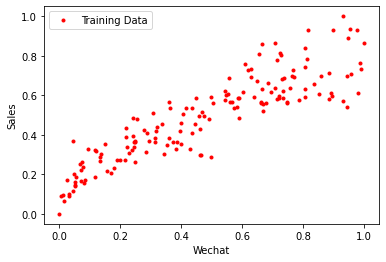

In [26]:
#画归一化之后的图
plt.plot(X_train,y_train,'r.',label='Training Data')
plt.xlabel('Wechat')
plt.ylabel('Sales')
plt.legend()
plt.show()

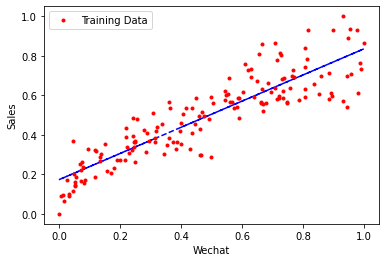

In [35]:
#这幅图是书里面的图。这里增加了一条回归线，因为X_train和y_train 是2D tensor, 而回归要求是vector （1D tensor),所以先reshape,再回归
X_train_1=X_train.reshape(len(X_train),)
y_train_1=y_train.reshape(len(y_train),)
m, b = np.polyfit(X_train_1, y_train_1, 1)#m is coefficient, b is intercept
plt.plot(X_train_1,m*X_train+b,'b--')
plt.plot(X_train,y_train,'r.',label='Training Data')
plt.xlabel('Wechat')
plt.ylabel('Sales')
plt.legend()
plt.show()

## 从这里开始进入第3步--选择机器学习模型
* 选用什么模型
* 参数如何确定

损失函数判断rule of thumb: 如果平均损失小，参数就好；如果平均损失大，模型或者参数就还要继续调整。\
* 用于回归的损失函数：
    * MSE
    * MAE
    * Mean bias error
* 用于分类的损失函数：
    * Cross-entropy loss 
    * Hinge loss

In [37]:
#定义Loss Function
def loss_function(X,y,weight,bias):
    y_hat=weight*X+bias
    loss=y_hat-y
    cost=np.sum(loss**2)/(2*len(X))
    return cost

In [41]:
print('当权重为5，bias为3时，损失为：', loss_function(X_train,y_train,weight=5,bias=3))
print('当权重为100，bias为1时，损失为：', loss_function(X_train,y_train,weight=100,bias=1))
print('当权重为3，bias为5时，损失为：', loss_function(X_train,y_train,weight=3,bias=5))
#The first one has less loss, which means that model is better. y=5x+3.
#注意：这里书出现了错误，他的线性回归方程写错了。

当权重为5，bias为3时，损失为： 12.796390970780058
当权重为100，bias为1时，损失为： 1577.9592615030556
当权重为3，bias为5时，损失为： 17.90059139723818


## 确定参数-通过梯度下降的方式
对于linear model 的Gradient descent 来说，任何一次前进，都要比上一次猜测时误差更小。\
*作者在梯度这里的公式求导求错了，看来作者数学没认真写啊*

在实战中，会花费相当多的时间来调整**学习效率**、**迭代次数**这样的我们成为***超参数***的东西。而权重和bias被称为***模型内部参数***，由梯度下降
来负责优化，不需要人工进行调整。

In [42]:
#梯度下降的代码：
def gradient_descent(X,y,w,b,lr,iter):#lr:learning rate
    l_history=np.zeros(iter)
    w_history=np.zeros(iter)
    b_history=np.zeros(iter)
    for i in range(iter):
        y_hat=w*X+b
        loss=y_hat-y
        derivative_w=X.T.dot(loss)/len(X)
        derivative_b=sum(loss)*1/len(X)
        w=w-lr*derivative_w
        b=b-lr*derivative_b
        l_history[i]=loss_function(X,y,w,b)
        w_history[i]=w
        b_history[i]=b
    return l_history,w_history,b_history

## 实现一元线性回归模型并调试超参数

In [43]:
#Set initial values
iterations=100
alpha=1 #learning rate=1
weight=-5
bias=3
print('当前损失：',loss_function(X_train,y_train,weight,bias))


当前损失： 1.343795534906634


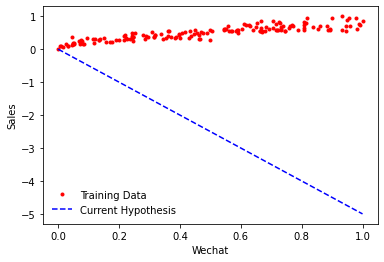

In [46]:
#画出当前的函数模型
plt.plot(X_train,y_train,'r.',label='Training Data')
line_X=np.linspace(X_train.min(),X_train.max())
line_y=[weight*m for m in line_X]
plt.plot(line_X,line_y,'b--',label='Current Hypothesis')
plt.xlabel('Wechat')
plt.ylabel('Sales')
plt.legend(frameon=False)
plt.show()

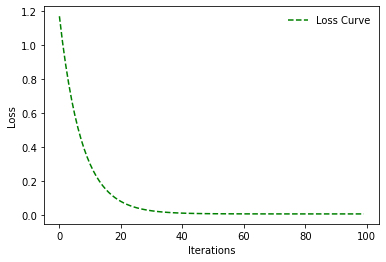

In [50]:
#进行梯度下降
loss_history,weight_history,bias_history=gradient_descent(X_train,y_train,weight,bias,alpha,iterations)
plt.plot(loss_history,'g--',label='Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(frameon=False)
plt.show()
#是我的问题，还是书里面图的问题？怎么我的loss方向和他相反，而且我的更符合直觉
#但是在60次以后损失已经不怎么变化了，说明我们的迭代次数选的过多了

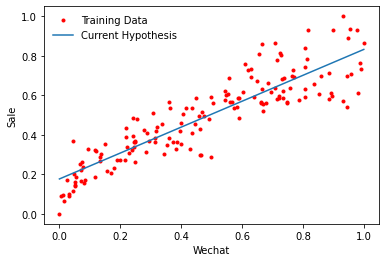

In [51]:
plt.plot(X_train,y_train,'r.',label='Training Data')
line_X=np.linspace(X_train.min(),X_train.max(),500)
line_y=[weight_history[-1]*m+bias_history[-1] for m in line_X]
plt.plot(line_X,line_y,label='Current Hypothesis')
plt.xlabel('Wechat')
plt.ylabel('Sale')
plt.legend(frameon=False)
plt.show()
#WOW,works fine this time.


Note: 我这里没有进行选择改变learning rate, 因为在我的图里，表现还ok， 唯一有问题需要改变的是iteration,不过对于这个数据量级来说
    速度问题也不是很大。

In [52]:
print('Current Loss:',loss_function(X_train,y_train,weight_history[-1],bias_history[-1]))
print('Current weight:',weight_history[-1])
print('Current Bias:', bias_history[-1])

Current Loss: 0.00465780405531404
Current weight: 0.6552253409192808
Current Bias: 0.17690341009472488


In [53]:
#试一下test set，看看损失如何
print('Current test_set loss: ', loss_function(X_test,y_test,weight_history[-1],bias_history[-1]))
#Works great!

Current test_set loss:  0.00458180938024721


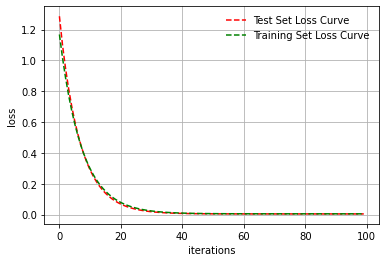

In [58]:
loss_history_1,weight_history_1,bias_history_1=gradient_descent(X_test,y_test,weight,bias,alpha,iterations)

plt.plot(loss_history_1,'r--',label='Test Set Loss Curve')
plt.plot(loss_history,'g--',label='Training Set Loss Curve')
plt.legend(frameon=False)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.grid()
plt.show()

For contour graph. 我无法安装io 和base64 packages, 所以先放下不表。